# Project details

**Project author:** Joanna Rancew


**Topic:** This project presents some of the fairness metrics, taken from the paper: Verma, Sahil, and Julia Rubin. "Fairness definitions explained." Proceedings of the international workshop on software fairness. 2018.
It validates a simple classifier for students grades dataset.

## Project setup

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

#### Utility functions

In [ ]:
def tp(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt==0:
          if yt == yp:
              tp += 1
    return tp

In [ ]:
def fp(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt>0:
          if yp==0:
              fp += 1
    return fp

In [ ]:
def fn(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt==0:
          if yp>0:
              fn += 1
    return fn

In [ ]:
def tn(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt>0:
          if yp>0:
              tn += 1
    return tn

In [ ]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [ ]:
def accuracy(y_true, y_pred):

    correct_predictions = 0

    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_predictions += 1

    return correct_predictions / len(y_true)

In [ ]:
#Probability of positive/negative predicted score

def positive_prob__score(class_val, data, target):
  number_of_predictions = 0

  for i in data[target]:
    if i==class_val:
      number_of_predictions+= 1

  return number_of_predictions / len(data)

In [ ]:
def pred_compare(pred_samples_girls, pred_samples_boys):
  matched=0
  for i in range(len(pred_samples_girls)):
    if pred_samples_girls[i]==0:
      if pred_samples_boys[i]==0:
        matched+=1

    else:
      if pred_samples_boys[i]>0:
        matched+=1

  return matched/len(pred_samples_girls)*100

# Dataset
The dataset used for performing measurement with fairness metrics: Student Performance Dataset is available on:  https://www.kaggle.com/datasets/devansodariya/student-performance-data?resource=download

It was obtained in a survey of student's math course in secondary school.
It consists of 33 features, including gender, age, size of family, grades and address.

As mentioned in the description, the dataset may consist imbalanced category features therefore cleaning and preprocessing is needed.


## Loading data, cleaning and preprocessing

In [ ]:
input_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFIS_project/student_data.csv')
input_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
input_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Data cleaning and preprocessing

In [ ]:
missing_values = input_data[input_data.isna().any(axis=1)]
print(missing_values)

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


Handling non numerical values

In [ ]:
student_data=handle_non_numerical_data(input_data)
student_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,0,0,0,4,4,1,0,...,4,3,4,1,1,3,6,5,6,6
1,1,0,17,0,0,1,1,1,1,3,...,5,3,3,1,1,3,4,5,5,6
2,1,0,15,0,1,1,1,1,1,3,...,4,3,2,2,3,3,10,7,8,10
3,1,0,15,0,0,1,4,2,2,4,...,3,2,2,1,1,5,2,15,14,15
4,1,0,16,0,0,1,3,3,3,3,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,0,1,0,2,2,4,4,...,5,5,4,4,5,4,11,9,9,9
391,0,1,17,0,1,1,3,1,4,4,...,2,4,5,3,4,2,3,14,16,16
392,0,1,21,1,0,1,1,1,3,3,...,5,5,3,3,3,3,3,10,8,7
393,0,1,18,1,1,1,3,2,4,3,...,4,4,1,3,4,5,0,11,12,10


##Data Visualization and feature engineering

###Combined average
For each student we calculate the combined average as: AVG=(G1+G2+G3)/3 and add it as a new column to the dataset.

In [ ]:
student_data['avg'] = (student_data['G1']+student_data['G2']+student_data['G3'])/3

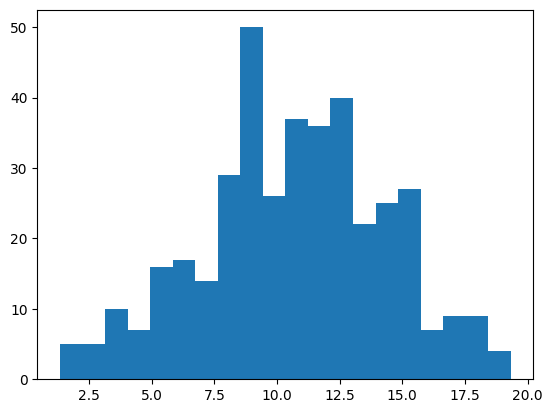

count    395.000000
mean      10.679325
std        3.696786
min        1.333333
25%        8.333333
50%       10.666667
75%       13.333333
max       19.333333
Name: avg, dtype: float64

In [ ]:
#plotting avg histogram
n_bins = 20

plt.hist(student_data['avg'], bins=n_bins)
plt.show()
student_data['avg'].describe()


For the binary classification task we need to perform binning - assigning linear values to specific number of bins. In this case we need 2 bins. The bound will be set at 11 - since 50% of the averages is no higher than 10.(6)

In [ ]:
bound=11

for i in range(len(student_data['avg'])):
  if student_data['avg'][i]>bound:
    student_data['avg'][i]=int(1)
  else:
    student_data['avg'][i]=int(0)

student_data['avg'] = student_data['avg'].astype(int)


<ipython-input-17-19aaa5455166>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data['avg'][i]=int(0)
<ipython-input-17-19aaa5455166>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data['avg'][i]=int(1)


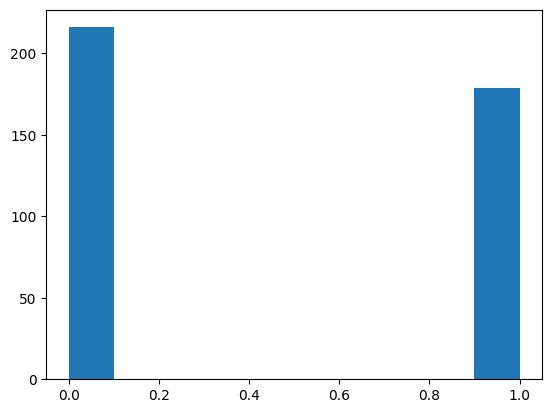

In [ ]:
#plotting avg histogram
n_bins = 10

plt.hist(student_data['avg'], bins=n_bins)
plt.show()

**Failures - data distribution**

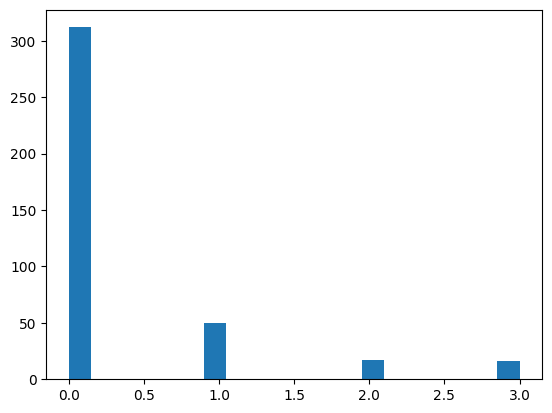

0    312
1     50
2     17
3     16
Name: failures, dtype: int64


In [ ]:
#plotting failures histogram
n_bins = 20
plt.hist(student_data['failures'], bins=20)
plt.show()

print(student_data['failures'].value_counts())




In [ ]:
for i in range(len(student_data['failures'])):
  if student_data['failures'][i]>0:
    student_data['failures'][i]=1


In [ ]:
student_data['failures'].describe()

count    395.000000
mean       0.210127
std        0.407915
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: failures, dtype: float64

### Protected features - address and gender distribution

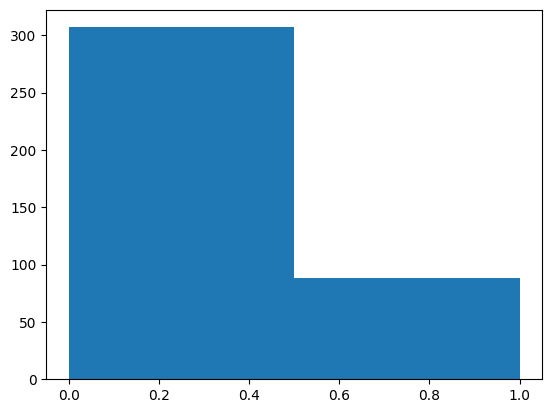

count    395.000000
mean       0.222785
std        0.416643
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: address, dtype: float64

In [ ]:
#plotting address histogram


plt.hist(student_data['address'], bins=2)
plt.show()
student_data['address'].describe()


We can see that the dataset is not balanced but for this project we will ignore the difference.

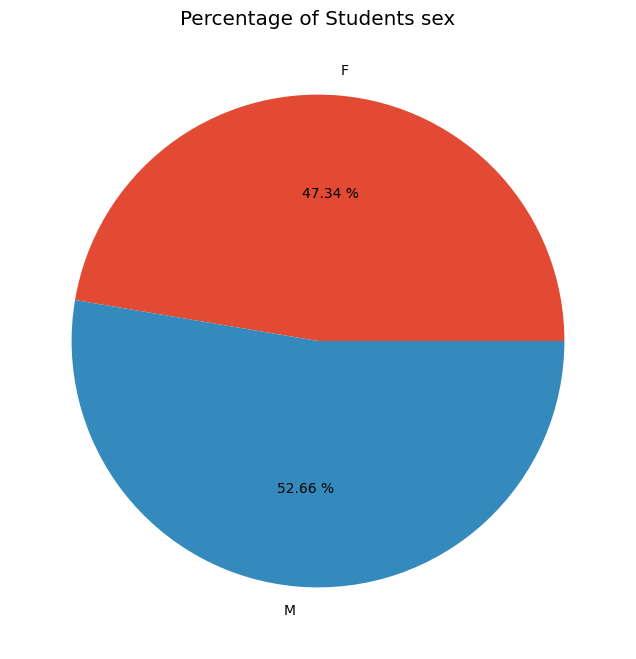

In [ ]:
#plotting gender distribution by plotting a histogram

F = student_data.loc[student_data['sex']==1].count()[1]
M = student_data.loc[student_data['sex']==0].count()[1]
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
labels = ['F','M']
plt.pie([F,M], labels=labels,autopct='%.2f %%')
plt.title('Percentage of Students sex')
plt.show()


# Fairness features for target: failures and protected class: sex

## Simple classifier
To determine and qualify the fairness features, one need to pursue a classification task. In this case we will classify students based on provided data in the task of predicting categorized number of failures (treating it as binary-class classification with for classes: 0 or 1)



In [ ]:
from sklearn.model_selection import train_test_split
X=student_data.loc[:, student_data.columns != 'failures']
y=student_data['failures']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



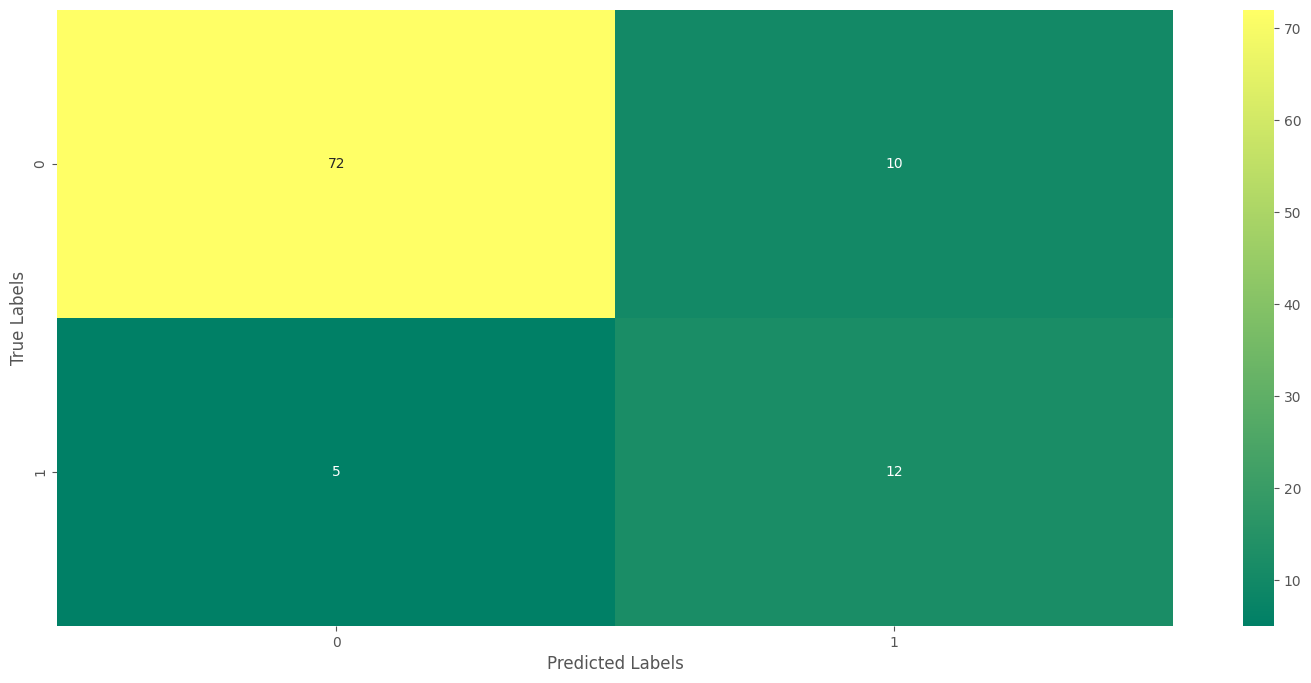

In [ ]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 15).fit(X_train, y_train)
dtree_pred = dtree_model.predict(X_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3])

plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(y_test, dtree_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
accuracy_score=accuracy(y_test, dtree_pred)
print("Overall accuracy: " + "%.4f" % accuracy_score)

Overall accuracy: 0.8485


In [ ]:
y_pred = pd.DataFrame(dtree_pred, columns = ['predicted'])
test_data_with_results = X_test.assign(target=y_pred["predicted"].to_numpy())
y_true = pd.DataFrame(y_test, columns = ['failures'])
test_data_with_results = test_data_with_results.assign(failures=y_true["failures"].to_numpy())

data=test_data_with_results

## Fairness definitions & utility functions


In [ ]:
#metrics for girls:
tp_girls= tp(data[data['sex']==1]['failures'],data[data['sex']==1]['target'])
fp_girls= fp(data[data['sex']==1]['failures'],data[data['sex']==1]['target'])
fn_girls= fn(data[data['sex']==1]['failures'],data[data['sex']==1]['target'])
tn_girls= tn(data[data['sex']==1]['failures'],data[data['sex']==1]['target'])

#metrics for boys:
tp_boys= tp(data[data['sex']==0]['failures'],data[data['sex']==0]['target'])
fp_boys= fp(data[data['sex']==0]['failures'],data[data['sex']==0]['target'])
fn_boys= fn(data[data['sex']==0]['failures'],data[data['sex']==0]['target'])
tn_boys= tn(data[data['sex']==0]['failures'],data[data['sex']==0]['target'])



### Definitions Based on Predicted Outcome

We can distinguish:

*   **Group fairness** (a.k.a. statistical parity, equal acceptance rate, benchmarking).
*   **Conditional statistical parity**



**Group fairness** is defined as follow:
A classifier satisfies this definition if subjects in both groups have equal probability of being assigned to the positive class.

In [ ]:
prob_score_positive_girl=positive_prob__score(0, data[data['sex']==1], 'failures')
print("Probability to be assigned a positive for girls: " + "%.2f" % prob_score_positive_girl)

prob_score_positive_boy=positive_prob__score(0, data[data['sex']==0], 'failures')
print("Probability to be assigned a positive for boys: " + "%.2f" % prob_score_positive_boy)



Probability to be assigned a positive for girls: 0.74
Probability to be assigned a positive for boys: 0.89


The difference and some bias is obvious. It does not satisfy the fairness definition.

**Conditional statistical parity**
For the purpose of the verification of this fairness definition, we suppose that legitimate feature for the number of failures is student age.

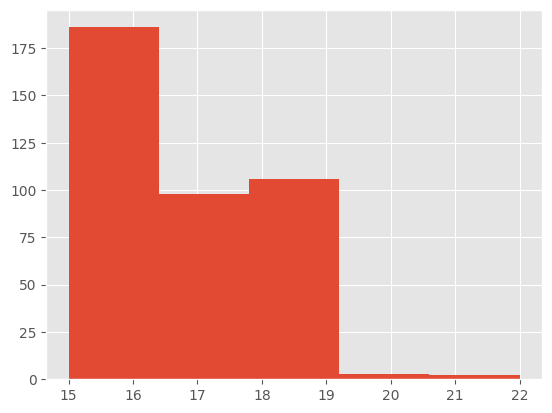

In [59]:
plt.hist(student_data['age'], bins=5)
plt.show()

As we can see the most represented group are students that have 15 years. For the consideration of this fairness metrics we decided to choose those group to check whether age incluences the a result or not.

In [60]:
data_school=data[(data['age']==15)]

prob_score_positive_girl_age=positive_prob__score(0, data_school[data_school['sex']==1], 'failures')
print("Probability to be assigned a positive for girls: " + "%.2f" % prob_score_positive_girl_age)

prob_score_positive_boy_age=positive_prob__score(0, data_school[data_school['sex']==0], 'failures')
print("Probability to be assigned a positive for boys: " + "%.2f" % prob_score_positive_boy_age)


Probability to be assigned a positive for girls: 0.43
Probability to be assigned a positive for boys: 0.88


The difference and some bias is presented. However, in this case the dataset may be not balanced due to filtering.

### Definitions Based on Predicted Outcome and Actual Outcomes

We can distinguish:


*   **Predictive parity** (a.k.a. outcome test)
*   **False positive error rate balance**(a.k.a. predictive equality)
*   **False negative error rate balance** (a.k.a. equal opportunity)
*  **Equalized odds** (a.k.a. conditional procedure accuracy equality and disparate mistreatment).
*   **Conditional use accuracy equality**
*   **Overall accuracy equality**
*   **Treatment equality**







A classifier satisfies definition of **predictive parity** if both protected and unprotected groups have equal PPV – the probability of a subject with positive predictive value to truly belong to the positive class.

In [ ]:
ppv_failures_girls=(tp_girls/(tp_girls+fp_girls))
print("For girls PPV: " + "%.2f" % ppv_failures_girls)

ppv_failures_boys=(tp_boys/(tp_boys+fp_boys))
print("For boys PPV: " + "%.2f" % ppv_failures_boys)

For girls PPV: 0.88
For boys PPV: 0.93


The difference and some bias is presented. It does not satisfy the fairness definition.

**False positive error rate balance** (a.k.a. predictive equality) is definied as follow: classifier satisfies this definition if both
protected and unprotected groups have equal FPR.

In [ ]:
fpr_failures_girls=(fp_girls/(fp_girls+tn_girls))
print("For girls FPR: " + "%.2f" % fpr_failures_girls)
print("Number of rows(girls, 1, 2 or 3 failures): " + "%.0f" % data[(data.sex==1) & (data.failures!=0)].shape[0])
print("Number of rows (girls, no failures): " + "%.0f" % data[(data.sex==1) & (data.failures==0)].shape[0])

print()
fpr_failures_boys=(fp_boys/(fp_boys+tn_boys))
print("For boys FPR: " + "%.2f" % fpr_failures_boys)
print("Number of rows (boys, 1, 2 or 3 failures): " + "%.0f" % data[(data.sex==0) & (data.failures!=0)].shape[0])
print("Number of rows (boys, no failures): " + "%.0f" % data[(data.sex==0) & (data.failures==0)].shape[0])

For girls FPR: 0.36
Number of rows(girls, 1, 2 or 3 failures): 11
Number of rows (girls, no failures): 31

For boys FPR: 0.50
Number of rows (boys, 1, 2 or 3 failures): 6
Number of rows (boys, no failures): 51


**False negative error rate balance** (a.k.a. equal opportunity) is definied as: A classifier satisfies this definition if both protected and unprotected groups have equal FNR – the probability of a subject in a positive class to have a negative predictive value.

In [ ]:
fnr_failures_girls=(fn_girls/(tp_girls+fn_girls))
print("For girls FNR: " + "%.2f" % fnr_failures_girls)

fnr_failures_boys=(fn_boys/(tp_boys+fn_boys))
print("For boys FNR: " + "%.2f" % fnr_failures_boys)

For girls FNR: 0.10
For boys FNR: 0.18


The difference and some bias is obvious. It does not satisfy the fairness definition.

**Equalized odds** This definition combines the previous two: a classifier satisfies the definition if protected and unprotected groups have equal TPR and equal FPR.

In [ ]:
tpr_failures_girls=(tp_girls/(tp_girls+fn_girls))
print("For girls TPR: " + "%.2f" % tpr_failures_girls)

tpr_failures_boys=(tp_boys/(tp_boys+fn_boys))
print("For boys TPR: " + "%.2f" % tpr_failures_boys)

print()

fpr_failures_girls=(fp_girls/(fp_girls+tn_girls))
print("For girls FPR: " + "%.2f" % fpr_failures_girls)

fpr_failures_boys=(fp_boys/(fp_boys+tn_boys))
print("For boys FPR: " + "%.2f" % fpr_failures_boys)

For girls TPR: 0.90
For boys TPR: 0.82

For girls FPR: 0.36
For boys FPR: 0.50


The difference is not that significant. It does satisfy the fairness definition.

**Conditional use accuracy equality** defined as:
equal PPV and NPV – the probability of subjects with positive predictive
value to truly belong to the positive class and the probability of
subjects with negative predictive value to truly belong to the negative class

In [ ]:
print("For girls PPV: " + "%.2f" % ppv_failures_girls)
print("For boys PPV: " + "%.2f" % ppv_failures_boys)

npv_failures_girls=(tn_girls/(tn_girls+fn_girls))
print("For girls NPV: " + "%.2f" % npv_failures_girls)

npv_failures_boys=(tn_boys/(tn_boys+fn_boys))
print("For boys NPV: " + "%.2f" % npv_failures_boys)

For girls PPV: 0.88
For boys PPV: 0.93
For girls NPV: 0.70
For boys NPV: 0.25


The difference and some bias is obvious. It does not satisfy the fairness definition.

**Overall accuracy equality** defined as:
A classifier satisfies this definition if both protected and unprotected groups have equal prediction accuracy – the probability of a subject from either positive or negative class to be assigned to its respective class.


In [ ]:
accuracy_girls=accuracy(data[data['sex']==1]['failures'], data[data['sex']==1]['target'])
print("For girls accuracy: " + "%.2f" % accuracy_girls)
accuracy_boys=accuracy(data[data['sex']==0]['failures'],data[data['sex']==0]['target'])
print("For boys accuracy: " + "%.2f" % accuracy_boys)

For girls accuracy: 0.83
For boys accuracy: 0.79


**Treatment equality** defined as:
A classifier satisfies this definition if both protected and unprotected
groups have an equal ratio of false negatives and false positives.

In [ ]:
equality_girls=(fn_girls/fp_girls)
print("For girls false negatives false positive ratio: " + "%.2f" % equality_girls)
equality_boys=(fn_boys/fp_boys)
print("For boys false negatives false positive ratio: " + "%.2f" % equality_boys)

For girls false negatives false positive ratio: 0.75
For boys false negatives false positive ratio: 3.00


### Similarity Based Measures

We can distinguish:
*  **Causal discrimination**
*   **Fairness through unawareness**
*   **Fairness through awareness**


**Causal discrimination** defined as follow: "A classifier satisfies this definition if it produces the same classification for any two subjects
with the exact same attributes X" [1]

In [ ]:
samples_girls=student_data[student_data['sex']==1][:10]
samples_boys = samples_girls[samples_girls.columns].copy()
samples_boys['sex']=0
pred_samples_girls = dtree_model.predict(samples_girls.drop(columns=['failures']))
pred_samples_boys = dtree_model.predict(samples_boys.drop(columns=['failures']))

result=pred_compare(pred_samples_girls, pred_samples_boys)

print("The same predictions were made for: "+ "%.0f" % result + "% samples")


The same predictions were made for: 100% samples


**Fairness through unawareness** defined as follow: A classifier satisfies
this definition if no sensitive attributes are explicitly used in the
decision-making process [1]

In [ ]:
from sklearn.model_selection import train_test_split
X_samples=student_data[student_data.columns].copy()
y_samples=X_samples['failures']
X_samples=X_samples.drop(columns=['failures','sex'])
X_train_samples, X_test_samples, y_train_samples, y_test_samples = train_test_split(X_samples, y_samples, random_state=0)

#TODO

In [ ]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model_samples = DecisionTreeClassifier(max_depth = 15).fit(X_train_samples, y_train_samples)

In [ ]:
samples_girls=student_data[student_data['sex']==1][:20]
samples_boys = samples_girls[samples_girls.columns].copy()
samples_boys['sex']=0
pred_samples_girls = dtree_model_samples.predict(samples_girls.drop(columns=['failures','sex']))
pred_samples_boys = dtree_model_samples.predict(samples_boys.drop(columns=['failures','sex']))

result=pred_compare(pred_samples_girls, pred_samples_boys)

print("The same predictions were made for: "+ "%.0f" % result + "% samples")

The same predictions were made for: 100% samples


**Fairness through awareness** defined by the principle that similar individuals should have similar classification.

We analyze the differences between inputs and the differences between predicted classes.

For the simplicity: as input difference we can define 0 if the sex is the same, 1 if not and D (distance metrics for distribution of output) defined as 0 if the result is different and 1 if the result is the same. The fairness definition becomes quite similar to the previous one.

In [ ]:
from sklearn.model_selection import train_test_split
X_samples=student_data[student_data.columns].copy()
y_samples=X_samples['failures']
X_samples=X_samples.drop(columns=['failures'])
X_train_samples, X_test_samples, y_train_samples, y_test_samples = train_test_split(X_samples, y_samples, random_state=0)

#TODO

In [ ]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model_samples = DecisionTreeClassifier(max_depth = 15).fit(X_train_samples, y_train_samples)

In [ ]:
samples_girls=student_data[student_data['sex']==1][:20]
samples_boys = samples_girls[samples_girls.columns].copy()
samples_boys['sex']=0
pred_samples_girls = dtree_model_samples.predict(samples_girls.drop(columns=['failures']))
pred_samples_boys = dtree_model_samples.predict(samples_boys.drop(columns=['failures']))

result=pred_compare(pred_samples_girls, pred_samples_boys)

print("The same predictions were made for: "+ "%.0f" % result + "% samples")

The same predictions were made for: 100% samples


# Fairness features for target: avg and protected class: address

## Simple classifier
To determine and qualify the fairness features, one need to pursue a classification task. In this case we will classify students based on provided data in the task of predicting number of failures (treating it as multi-class classification with for classes: 0, 1, 2, 3)



In [ ]:
X=student_data.loc[:, student_data.columns != 'avg']
y=student_data['avg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


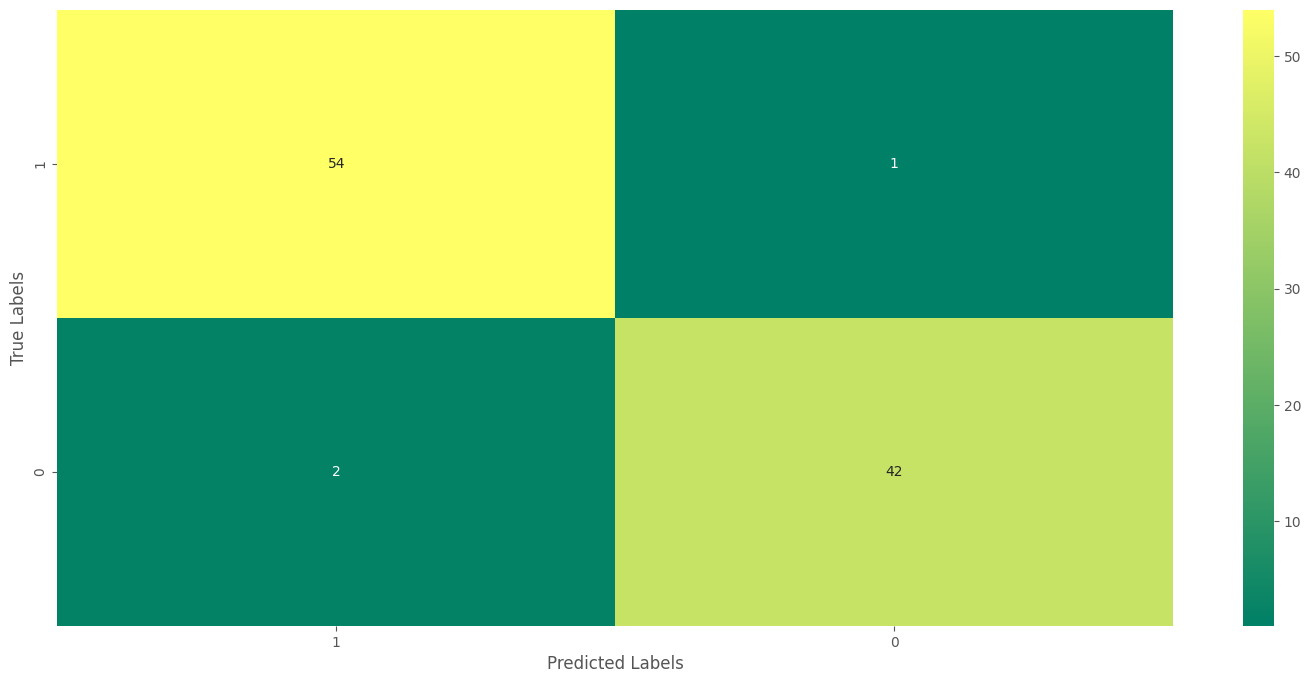

In [ ]:
# training a DescisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 15).fit(X_train, y_train)
dtree_pred = dtree_model.predict(X_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3])

plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(y_test, dtree_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
correct_predictions = 0

for yt, yp in zip(y_test, dtree_pred):
    if yt == yp:
        correct_predictions += 1

accuracy=correct_predictions / len(y_true)
accuracy

0.9696969696969697

In [ ]:
y_pred = pd.DataFrame(dtree_pred, columns = ['predicted'])
test_data_with_results = X_test.assign(target=y_pred["predicted"].to_numpy())
y_true = pd.DataFrame(y_test, columns = ['avg'])
test_data_with_results = test_data_with_results.assign(avg=y_true["avg"].to_numpy())

data=test_data_with_results

## Fairness definitions & utility functions


In [ ]:
#metrics for address U:
tp_u= tp(data[data['address']==1]['avg'],data[data['address']==1]['target'])
fp_u= fp(data[data['address']==1]['avg'],data[data['address']==1]['target'])
fn_u= fn(data[data['address']==1]['avg'],data[data['address']==1]['target'])
tn_u= tn(data[data['address']==1]['avg'],data[data['address']==1]['target'])

#metrics for address R:
tp_r= tp(data[data['address']==0]['avg'],data[data['address']==0]['target'])
fp_r= fp(data[data['address']==0]['avg'],data[data['address']==0]['target'])
fn_r= fn(data[data['address']==0]['avg'],data[data['address']==0]['target'])
tn_r= tn(data[data['address']==0]['avg'],data[data['address']==0]['target'])


### Definitions Based on Predicted Outcome


**Group fairness** is defined as follow:
A classifier satisfies this definition if subjects in both groups have equal probability of being assigned to the positive class.

In [33]:
prob_score_positive_U=positive_prob__score(0, data[data['address']==1],'avg')
print("Probability to be assigned a positive for address U: " + "%.2f" % prob_score_positive_girl)

prob_score_positive_R=positive_prob__score(0, data[data['address']==0],'avg')
print("Probability to be assigned a positive for address R: " + "%.2f" % prob_score_positive_boy)


Probability to be assigned a positive for address U: 0.74
Probability to be assigned a positive for address R: 0.89


The difference and some bias is presented. It does not satisfy the fairness definition.

**Conditional statistical parity**
For the purpose of the verification of this fairness definition, we suppose that legitimate feature for the number of failures is again student age.

In [36]:
data_school=data[(data['age']==18)]

prob_score_positive_U_age=positive_prob__score(0, data_school[data_school['sex']==1],'avg')
print("Probability to be assigned a positive for address U: " + "%.2f" % prob_score_positive_U_age)

prob_score_positive_R_age=positive_prob__score(0, data_school[data_school['sex']==0],'failures')
print("Probability to be assigned a positive for address R: " + "%.2f" % prob_score_positive_R_age)

Probability to be assigned a positive for address U: 0.57
Probability to be assigned a positive for address R: 0.86


The difference and some bias is presented. However, in this case the dataset again may be not balanced due to filtering.

### Definitions Based on Predicted Outcome and Actual Outcomes






A classifier satisfies definition of **predictive parity** if both protected and unprotected groups have equal PPV – the probability of a subject with positive predictive value to truly belong to the positive class.

In [ ]:
ppv_u=(tp_u/(tp_u+fp_u))
print("For address U PPV: " + "%.2f" % ppv_u)

ppv_r=(tp_r/(tp_r+fp_r))
print("For address R PPV: " + "%.2f" % ppv_r)

For address U PPV: 1.00
For address R PPV: 0.96


The difference and bias is insignificant. It does  satisfy the fairness definition.

**False positive error rate balance**(a.k.a. predictive equality) is definied as follow: classifier satisfies this definition if both
protected and unprotected groups have equal FPR.

In [ ]:
fpr_u=(fp_u/(fp_u+tn_u))
print("For U FPR: " + "%.2f" % fpr_u)

print()
fpr_r=(fp_r/(fp_r+tn_r))
print("For boys FPR: " + "%.2f" % fpr_r)


For U FPR: 0.00

For boys FPR: 0.05


**False negative error rate balance** (a.k.a. equal opportunity) is definied as: A classifier satisfies this definition if both protected and unprotected groups have equal FNR – the probability of a subject in a positive class to have a negative predictive value.

In [ ]:
fnr_u=(fn_u/(tp_u+fn_u))
print("For address U FNR: " + "%.2f" % fnr_u)

fnr_r=(fn_r/(tp_r+fn_r))
print("For address R FNR: " + "%.2f" % fnr_r)

For address U FNR: 0.00
For address R FNR: 0.02


**Equalized odds** This definition combines the previous two: a classifier satisfies the definition if protected and unprotected groups have equal TPR and equal FPR.

In [ ]:
tpr_u=(tp_u/(tp_u+fn_u))
print("For U TPR: " + "%.2f" % tpr_u)

tpr_r=(tp_r/(tp_r+fn_r))
print("For R TPR: " + "%.2f" % tpr_r)

print()

fpr_u=(fp_u/(fp_u+tn_u))
print("For U FPR: " + "%.2f" % fpr_u)

fpr_r=(fp_r/(fp_r+tn_r))
print("For R FPR: " + "%.2f" % fpr_r)

For U TPR: 1.00
For R TPR: 0.98

For U FPR: 0.00
For R FPR: 0.05


**Conditional use accuracy equality** defined as:
equal PPV and NPV – the probability of subjects with positive predictive
value to truly belong to the positive class and the probability of
subjects with negative predictive value to truly belong to the negative class

In [ ]:
print("For U PPV: " + "%.2f" % ppv_u)
print("For R PPV: " + "%.2f" % ppv_r)

npv_u=(tn_u/(tn_u+fn_u))
print("For U NPV: " + "%.2f" % npv_u)

npv_r=(tn_r/(tn_r+fn_r))
print("For R NPV: " + "%.2f" % npv_r)

For U PPV: 1.00
For R PPV: 0.96
For U NPV: 1.00
For R NPV: 0.97


**Overall accuracy equality** defined as:
A classifier satisfies this definition if both protected and unprotected groups have equal prediction accuracy – the probability of a subject from either positive or negative class to be assigned to its respective class.


In [ ]:
correct_predictions = 0

for yt, yp in zip(data[data['address']==1]['avg'], data[data['address']==1]['target']):
    if yt == yp:
        correct_predictions += 1

accuracy_u=correct_predictions / len(data[data['address']==1]['avg'])


print("For U accuracy: " + "%.2f" % accuracy_u)

correct_predictions = 0

for yt, yp in zip(data[data['address']==0]['avg'],data[data['address']==0]['target']):
    if yt == yp:
        correct_predictions += 1

accuracy_r=correct_predictions / len(data[data['address']==0]['avg'])

print("For R accuracy: " + "%.2f" % accuracy_r)

For U accuracy: 1.00
For R accuracy: 0.96


**Treatment equality** defined as:
A classifier satisfies this definition if both protected and unprotected
groups have an equal ratio of false negatives and false positives.

In [ ]:
equality_u=(fn_u/(fp_u+0.001))
print("For U false negatives false positive ratio: " + "%.2f" % equality_u)
equality_r=(fn_r/fp_r)
print("For R false negatives false positive ratio: " + "%.2f" % equality_r)

For U false negatives false positive ratio: 0.00
For R false negatives false positive ratio: 0.50


### Similarity Based Measures

We can distinguish:
*  **Causal discrimination**
*   **Fairness through unawareness**
*   **Fairness through awareness**


**Causal discrimination** defined as follow: "A classifier satisfies this definition if it produces the same classification for any two subjects
with the exact same attributes X" [1]

In [ ]:
samples_u=student_data[student_data['address']==1][:10]
samples_r = samples_girls[samples_u.columns].copy()
samples_r['address']=0
pred_samples_u = dtree_model.predict(samples_u.drop(columns=['avg']))
pred_samples_r = dtree_model.predict(samples_r.drop(columns=['avg']))

result=pred_compare(pred_samples_u, pred_samples_r)

print("The same predictions were made for: "+ "%.0f" % result + "% samples")


The same predictions were made for: 60% samples


**Fairness through unawareness** defined as follow: A classifier satisfies
this definition if no sensitive attributes are explicitly used in the
decision-making process [1]

In [ ]:
from sklearn.model_selection import train_test_split
X_samples=student_data[student_data.columns].copy()
y_samples=X_samples['avg']
X_samples=X_samples.drop(columns=['avg','address'])

X_train_samples, X_test_samples, y_train_samples, y_test_samples = train_test_split(X_samples, y_samples, random_state=0)


In [ ]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model_samples_address = DecisionTreeClassifier(max_depth = 15).fit(X_train_samples, y_train_samples)

In [ ]:

samples_u=student_data[student_data['address']==1][:20]
samples_r = samples_u[samples_u.columns].copy()
samples_r['address']=0
pred_samples_u = dtree_model_samples_address.predict(samples_u.drop(columns=['avg','address']))
pred_samples_r = dtree_model_samples_address.predict(samples_r.drop(columns=['avg','address']))

result=pred_compare(pred_samples_u, pred_samples_r)

print("The same predictions were made for: "+ "%.0f" % result + "% samples")


The same predictions were made for: 100% samples


**Fairness through awareness** defined by the principle that similar individuals should have similar classification.

We analyze the differences between inputs and the differences between predicted classes.

For the simplicity: as input difference we can define 0 if the sex is the same, 1 if not and D (distance metrics for distribution of output) defined as 0 if the result is different and 1 if the result is the same. The fairness definition becomes quite similar to the previous one.

In [ ]:
from sklearn.model_selection import train_test_split
X_samples=student_data[student_data.columns].copy()
y_samples=X_samples['avg']
X_samples=X_samples.drop(columns=['avg'])
X_train_samples, X_test_samples, y_train_samples, y_test_samples = train_test_split(X_samples, y_samples, random_state=0)


In [ ]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model_samples_avg = DecisionTreeClassifier(max_depth = 15).fit(X_train_samples, y_train_samples)

In [ ]:
samples_u=student_data[student_data['address']==1][:20]
samples_r = samples_u[samples_u.columns].copy()
samples_r['address']=0
pred_samples_u = dtree_model_samples_avg.predict(samples_u.drop(columns=['avg']))
pred_samples_r = dtree_model_samples_avg.predict(samples_r.drop(columns=['avg']))

result=pred_compare(pred_samples_u, pred_samples_r)

print("The same predictions were made for: "+ "%.0f" % result + "% samples")

The same predictions were made for: 100% samples


# Causal Reasoning for both of the target classes

We can distinguish:
*   **Counterfactual fairness**
*  **No unresolved discrimination**
*   **No proxy discrimination**
*   **Fair inference**

Given causal graph:
a directed, acyclic graph with nodes representing attributes of
a student and edges representing relationships between the attributes.

According to the article [1] it is not possible to test an existing classifier against the causal definitions of fairness. Nevertheles, we can try to understand dependability between features and look for possible paths in the graph.


There are no clear connections that would drive us to the causal graph but we decided to make some assumptions.

Yet, the assumptions below does not include any results or conclusions that are certain.

**Counterfactual fairness** A causal graph is counterfactually fair if the predicted outcome (in our case number of failures) in the graph does not
depend on a descendant of the protected attribute G.

For the protected class address and sex -> the predicted output does not depend on any of them. The combined average and number of failures is not dependent of address or sex of the student.



**No unresolved discrimination** for the target class avg and class number of failures - there is no path from the protected attribute (address or sex) to any of them.

**No proxy discrimination**  
A classifier is free of proxy discrimination if there exists no path in causal graph from the protected attribute to the predicted outcome that is blocked by a proxy variable.

**Fair inference** defined as: no illegitimate paths from protected class to target class. In our case - there is no illegitimate paths in causal graph.